<a href="https://colab.research.google.com/github/Katinon/Self-Study/blob/main/%ED%98%BC%EC%9E%90-%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%94%A5%EB%9F%AC%EB%8B%9D/14_DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

In [6]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1) :
  n = len(arr)
  rows = int(np.ceil(n/10)) #올림
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows) :
    for j in range(cols) :
      if i*10 + j < n :
        axs[i, j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()

In [2]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
#PCA 클래스로 주성분 분석 알고리즘
# n_components 매개변수에 주성분의 개수 지정
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [5]:
print(pca.components_.shape) #50개 주성분, 1만개 특성

(50, 10000)


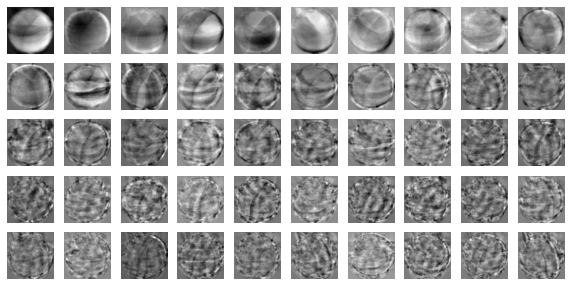

In [9]:
#주성분을 그림으로 그리기
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [10]:
# 특성의 개수를 1만개에서 50개로 줄이기, 차원 축소
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [11]:
# 차원축소 데이터로 원본 데이터 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


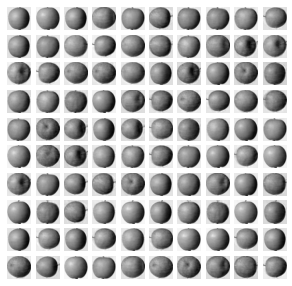

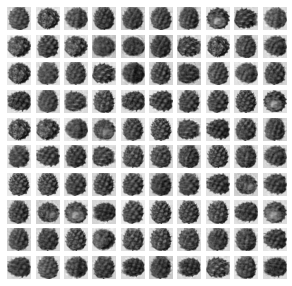

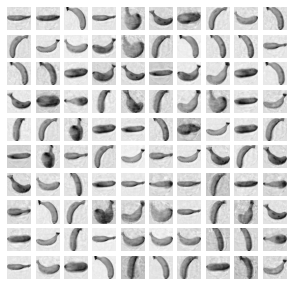

In [15]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200] :
  draw_fruits(fruits_reconstruct[start:start+100], ratio=0.5)
  print("\n")

# 50개의 특성을 1만개의 특성으로 복원했다.

In [16]:
# 설명된 분산 : 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
print(np.sum(pca.explained_variance_ratio_))
# 92%의 분산 유지

0.921517484011715


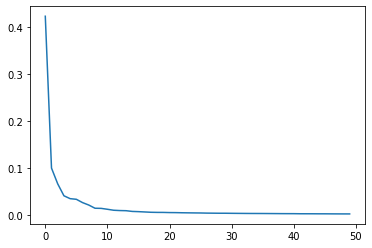

In [17]:
plt.plot(pca.explained_variance_ratio_)
plt.show()
# 10개의 주성분이 대부분의 분산 표현

In [18]:
# 축소한 데이터를 지도학습에 적용
# 로지스틱 회귀 모델 사용

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

target = np.array([0]*100 + [1]*100 + [2]*100) # 타깃 데이터 만들기

In [20]:
# 성능 가늠을 위해 교차검증 수행
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 1만개의 특성이기 때문에 과대적합하기 쉬움

0.9966666666666667
0.9674365997314454


In [21]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 100% 정확도와 짧은 훈련 시간을 나타냄

1.0
0.02288055419921875


In [23]:
# 원하는 설명된 분산 비율 입력해서 주성분 갯수 찾기
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

print(pca.n_components_) #주성분의 갯수
# 2개의 특성만으로도 분산의 50% 표현 가능

2


In [25]:
fruits_pca = pca.transform(fruits_2d)

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 2개의 특성만으로도 충분한 점수가 나온다
# 반복횟수를 증가하라는 경고가 나오지만 교차검증의 결과가 충분히 좋기에 상관없다

0.9933333333333334
0.03908839225769043


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [26]:
# 차원 축소된 데이터로 k-평균 알고리즘
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


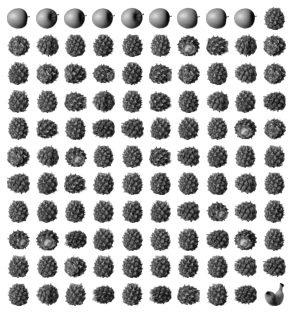

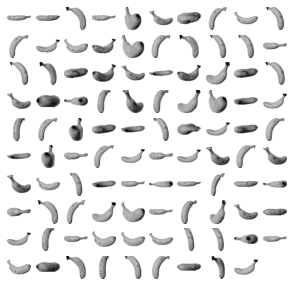

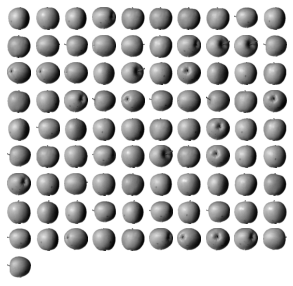

In [27]:
for label in range(0, 3) :
  draw_fruits(fruits[km.labels_ == label], ratio=0.5)
  print("\n")

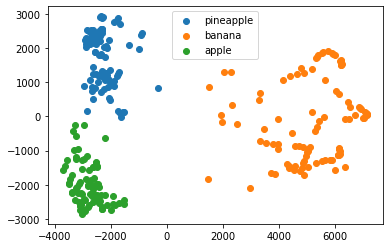

In [29]:
# 특성이 2개이기 때문에 2차원으로 표현 가능하다
for label in range(0, 3) :
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()